In [42]:

from util.sql_switch import get_query_native

df = get_query_native(
    "SELECT depth, branching_factor as branching, root_dominance as rdom from delab_conversation")

df.head(3)

using postgres


/home/dehne/PycharmProjects/delab/venv/lib/python3.10/site-packages/pandas/io/sql.py:761: UserWarning:

pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy



,depth,branching,rdom
0,5,26.0,0.227273
1,2,6.0,0.166667
2,9,199.0,0.005025


In [43]:
# normalizing and setting up the direction of the weights
import pandas as pd



df_normalized=(df - df.mean()) / df.std()
df_normalized["branching"] *= -1
df_normalized["rdom"] *= -1

df_normalized.head(3)

,depth,branching,rdom
0,0.168670,0.391345,0.123726
1,-0.633054,0.615569,0.134161
2,1.237636,-1.548189,0.161992


In [44]:
# check correlations first
df_normalized.corr()


,depth,branching,rdom
depth,1.000000,-0.068890,-0.122673
branching,-0.068890,1.000000,-0.039164
rdom,-0.122673,-0.039164,1.000000


                PC0       PC1       PC2
depth      0.734670  0.160411 -0.659187
branching -0.198560 -0.878255 -0.435019
rdom      -0.648716  0.450484 -0.613377


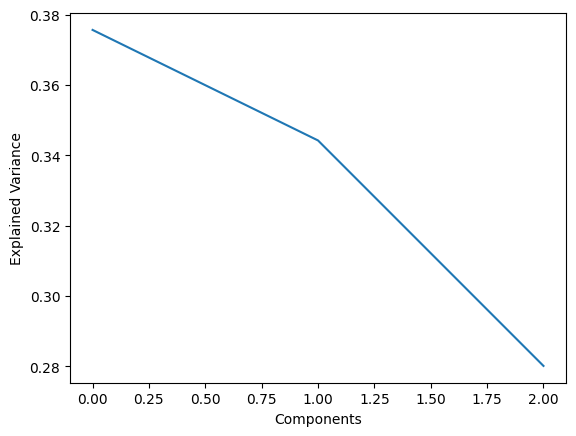

In [45]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plot

# pca = PCA(n_components=3)
pca = PCA(n_components=3)
pca.fit(df_normalized)

# Reformat and view results
loadings = pd.DataFrame(pca.components_.T,
columns=['PC%s' % _ for _ in range(len(df_normalized.columns))],
index=df.columns)
print(loadings)

plot.plot(pca.explained_variance_ratio_)
plot.ylabel('Explained Variance')
plot.xlabel('Components')
plot.show()


In [46]:
import plotly.express as px
fig = px.scatter_matrix(
    df_normalized,
    dimensions=df_normalized.columns,
    color="depth"
)
fig.update_traces(diagonal_visible=False)
fig.show()

In [51]:
# even more visualizations
labels = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca.explained_variance_ratio_ * 100)
}

pca = PCA()
components = pca.fit_transform(df_normalized)
fig = px.scatter_matrix(
    components,
    labels=labels,
    dimensions=range(3),
    color=df["branching"]
)
fig.update_traces(diagonal_visible=False)
fig.show()

